![insomnia](insomnia.jpg)


# SleepInc: Helping you find better sleep 😴

## 📖 Background

Your client is SleepInc, a sleep health company that recently launched a sleep-tracking app called SleepScope. The app monitors sleep patterns and collects users' self-reported data on lifestyle habits. SleepInc wants to identify lifestyle, health, and demographic factors that strongly correlate with poor sleep quality. They need your help to produce visualizations and a summary of findings for their next board meeting! They need these to be easily digestible for a non-technical audience!

## 💾 The data

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

## 💪 Challenge

Leverage this sleep data to analyze the relationship between lifestyle, health, demographic factors, and sleep quality. Your goal is to identify factors that correlate with poor sleep health.

Some examples:

- Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.
- Produce recommendations on ways people can improve sleep health based on the patterns in the data.
- Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.

# Imports

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style('whitegrid')

In [216]:
data = pd.read_csv('data/sleep_health_data.csv')
# target feature
target = 'Quality of Sleep'

In [217]:
data['Blood Pressure High'] = data['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
data['Blood Pressure Low'] = data['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))
data = data.drop('Blood Pressure', axis = 1)

In [359]:
bmi_mapping = {
    'Normal': 'Normal',
    'Normal Weight': 'Normal',
    'Overweight': 'Overweight',
    'Obese': 'Obese'
}

sleep_mapping = {
    4: 'bad',
    5: 'bad',
    6: 'ok',
    7: 'ok',
    8: 'good',
    9: 'good'
}

target_mapping = {
    4: 1,
    5: 1,
    6: 1,
    7: 0,
    8: 0,
    9: 0
}

# Remap these categories
data['Quality'] = data['Quality of Sleep'].map(sleep_mapping)
data['BMI Category'] = data['BMI Category'].map(bmi_mapping)

In [219]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure High,Blood Pressure Low,Quality
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,ok
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,ok
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,ok
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,bad
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,bad


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Blood Pressure High      374 non-null    int64  
 13  Blood Pressure Low       374 non-null    int64  
 14  Quality                  3

# Q1. Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.

## Distribution of Target Variable

In [221]:
df = data.copy()
df = df.drop('Person ID', axis = 1)
num_features = df.select_dtypes(exclude = 'object').columns

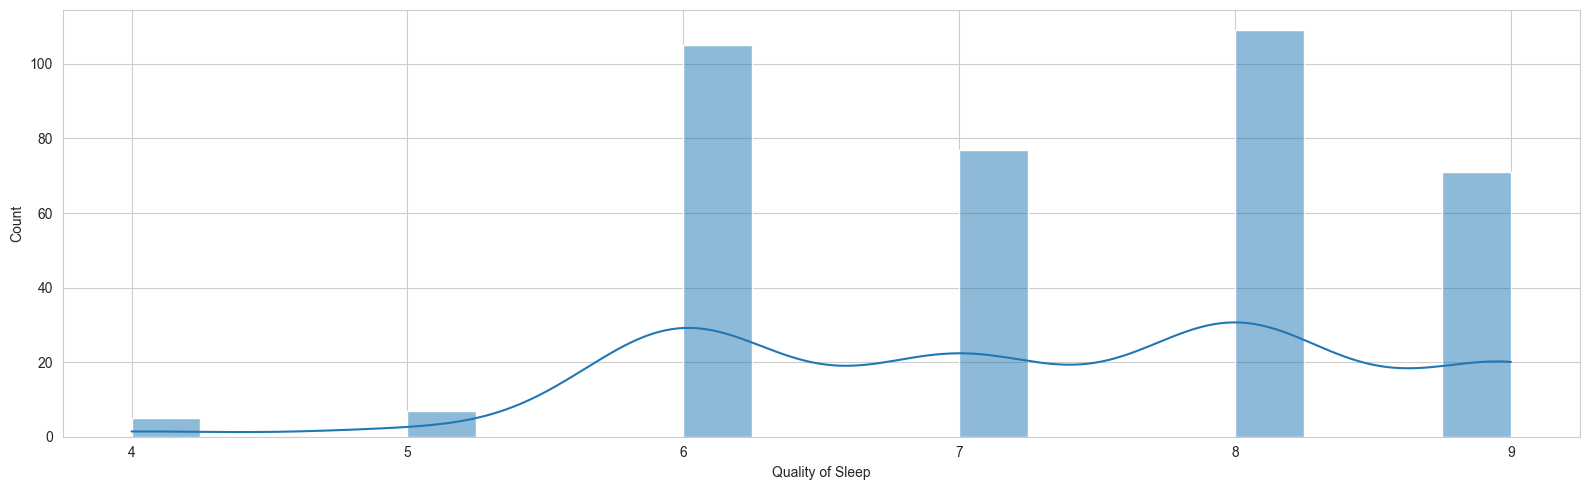

In [222]:
plt.figure(figsize = (16, 5))
sns.histplot(data = df, x = 'Quality of Sleep', kde = True, bins = 20)
plt.tight_layout()

## Distribution of Age based on Sleep Quality

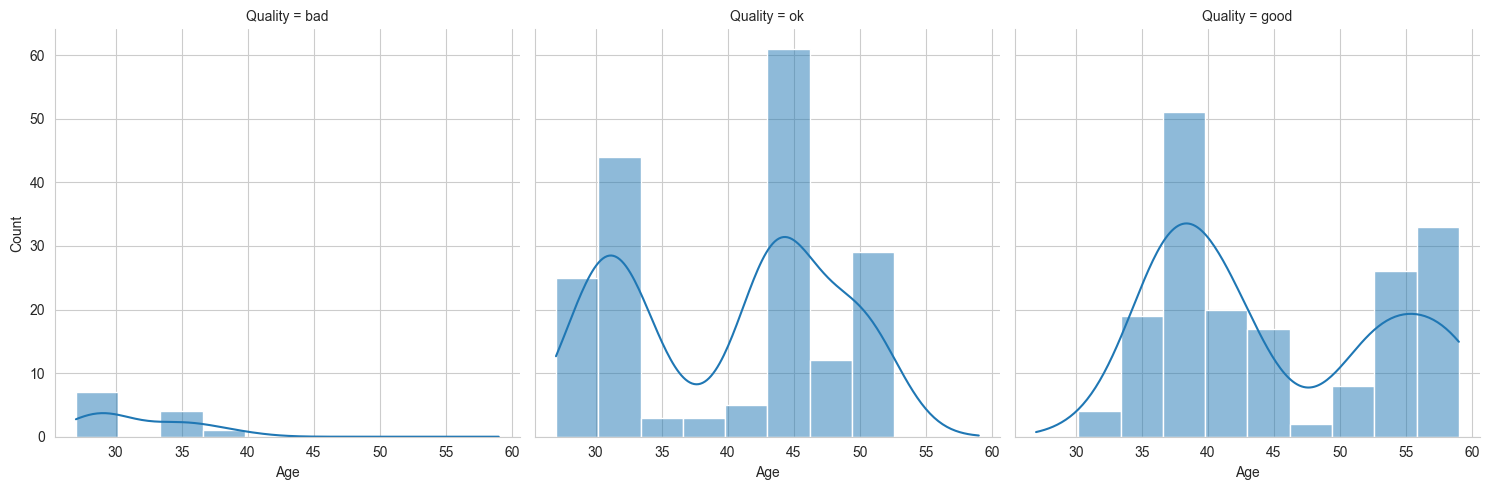

In [223]:
sns.displot(df, x = 'Age', kde = True, col='Quality', col_order=['bad', 'ok', 'good'])
plt.tight_layout()

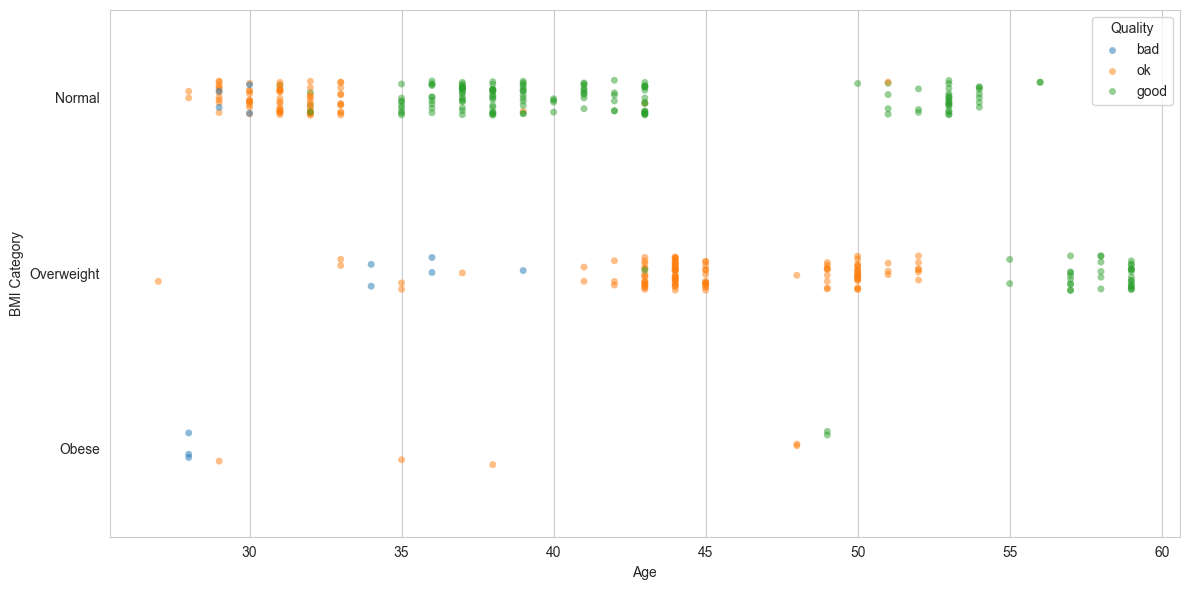

In [224]:
plt.figure(figsize = (12, 6))
sns.stripplot(data = df, x = 'Age', y = "BMI Category", hue = "Quality", hue_order = ['bad', 'ok', 'good'], order = ['Normal', 'Overweight', 'Obese'], alpha = 0.5, jitter=True)
plt.tight_layout()

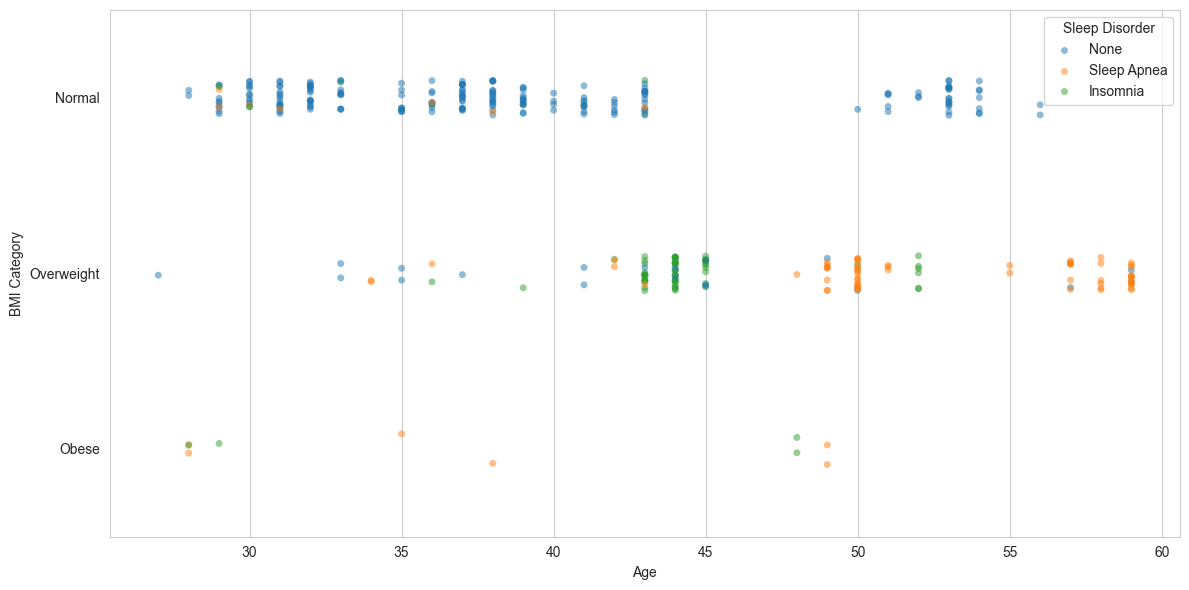

In [235]:
plt.figure(figsize = (12, 6))
sns.stripplot(data = df, x = 'Age', y = "BMI Category", hue = "Sleep Disorder", order = ['Normal', 'Overweight', 'Obese'], alpha = 0.5, jitter=True)
plt.tight_layout()

## Correlation among numeric features

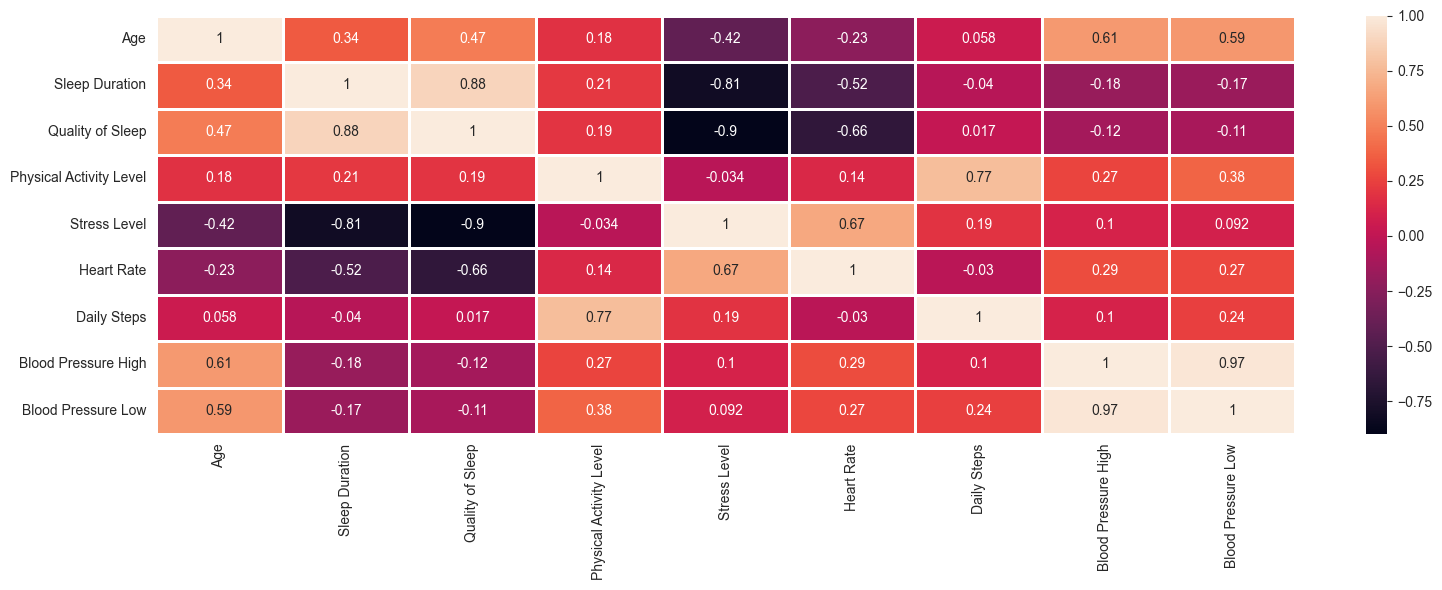

In [225]:
plt.figure(figsize = (16, 6))

df = data.copy()
df = df.drop('Person ID', axis = 1)
sns.heatmap(df[num_features].corr(), annot = True, linewidths=2)
plt.tight_layout()

## Correlation with Quality of Sleep

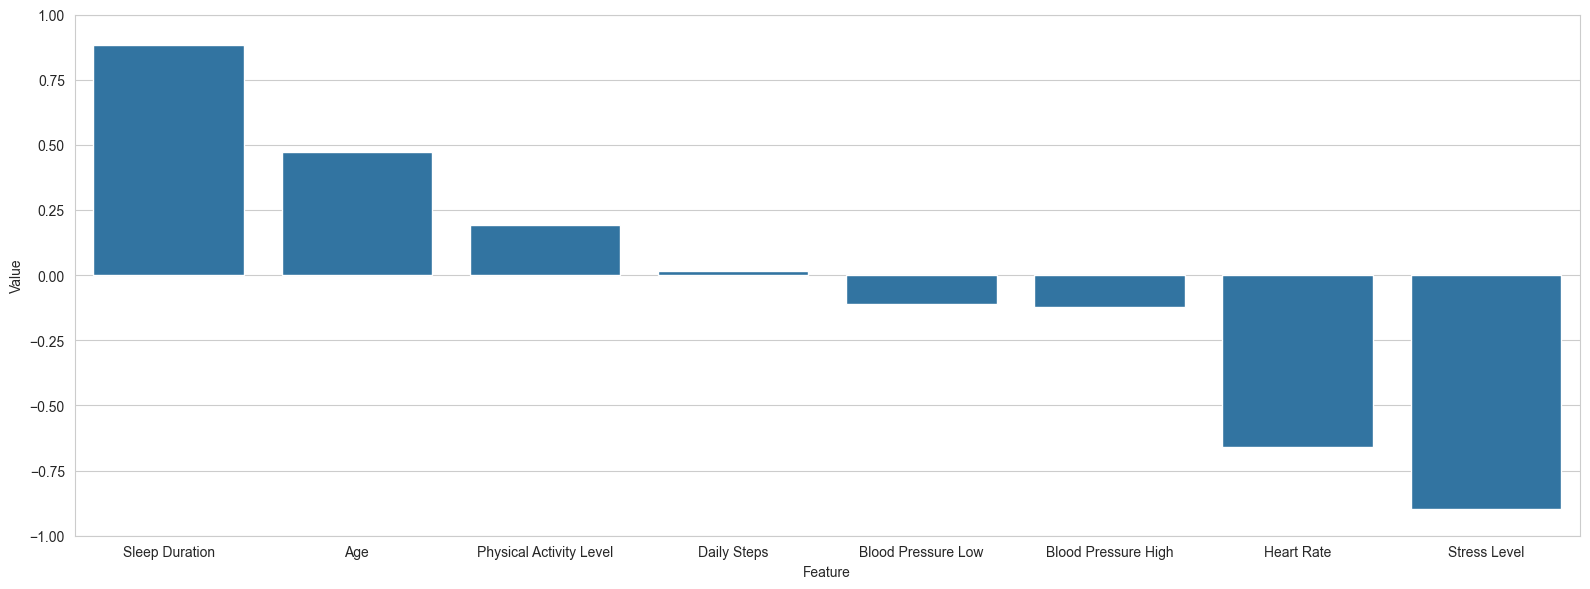

In [226]:
plt.figure(figsize = (16, 6))
tmp = df[num_features].corr()['Quality of Sleep'].reset_index()
tmp.columns = ['Feature', 'Value']
tmp = tmp.sort_values(by = 'Value', ascending = False)[1:]
sns.barplot(data = tmp, x = 'Feature', y = 'Value')
plt.ylim(-1, 1)

plt.tight_layout()

In [227]:
# Correlation values
tmp

,Feature,Value
1,Sleep Duration,0.883213
0,Age,0.473734
3,Physical Activity Level,0.192896
6,Daily Steps,0.016791
8,Blood Pressure Low,-0.110151
7,Blood Pressure High,-0.121632
5,Heart Rate,-0.659865
4,Stress Level,-0.898752


In [228]:
features = []
for i, row in tmp.iterrows():
    item = {}
    item['feature'] = row['Feature']
    item['corr'] = round(row['Value'], 3)
    features.append(item)

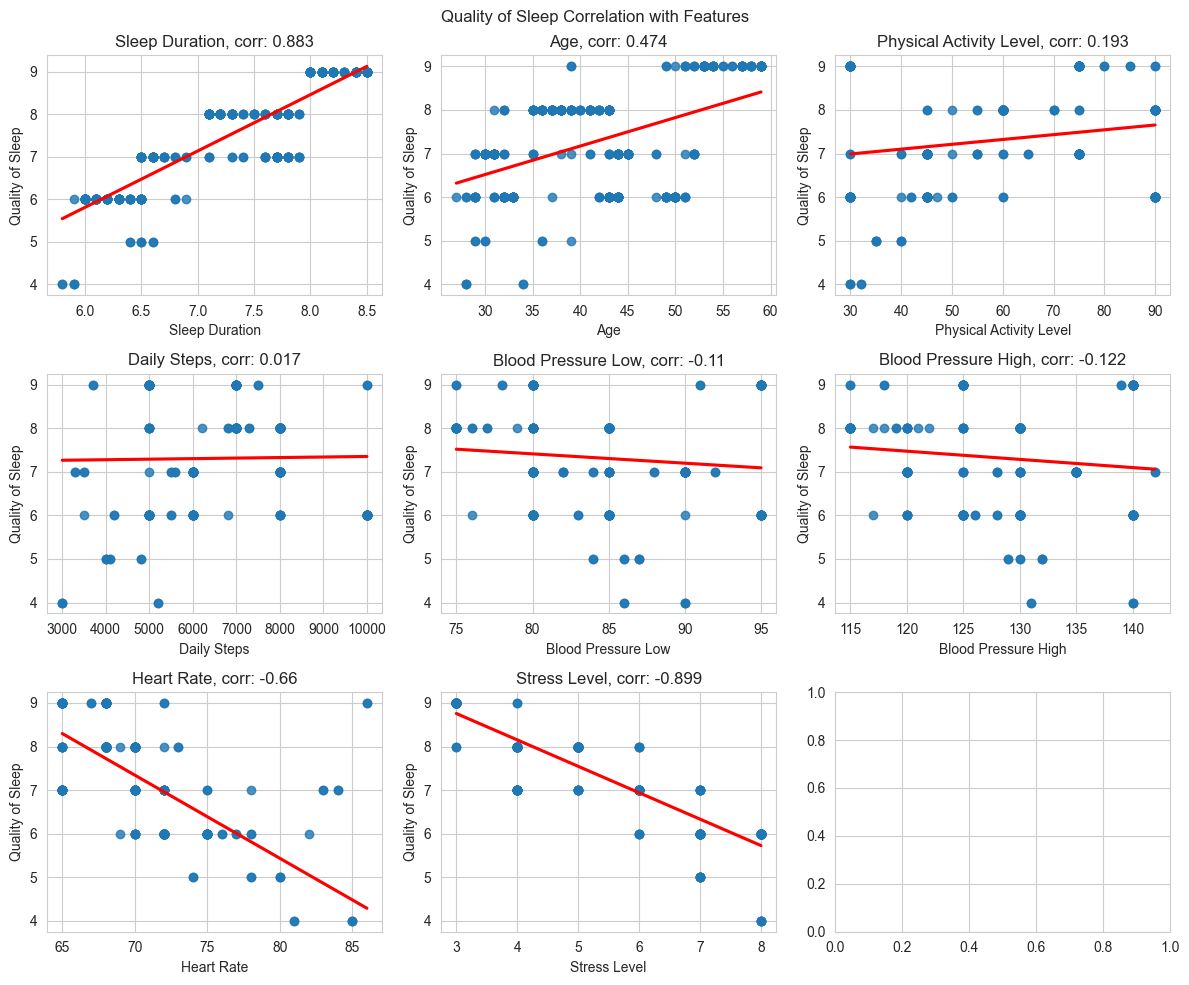

In [230]:
fig, axs = plt.subplots(3, 3, figsize = (12, 10))
axs = axs.flatten()

i = 0
for feat in features:
    sns.regplot(data = df, x = feat['feature'], y = target, ax = axs[i], ci = None, line_kws={'color':'red'})
    axs[i].set_title(f"{feat['feature']}, corr: {feat['corr']}")
    i += 1
fig.suptitle("Quality of Sleep Correlation with Features")
plt.tight_layout()

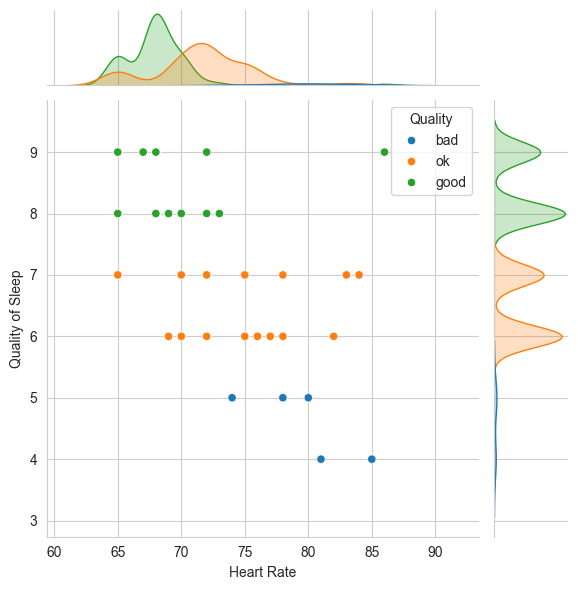

In [170]:
sns.jointplot(data = df, x = 'Heart Rate', y = 'Quality of Sleep', hue = 'Quality', hue_order = ['bad', 'ok', 'good'])
plt.show()

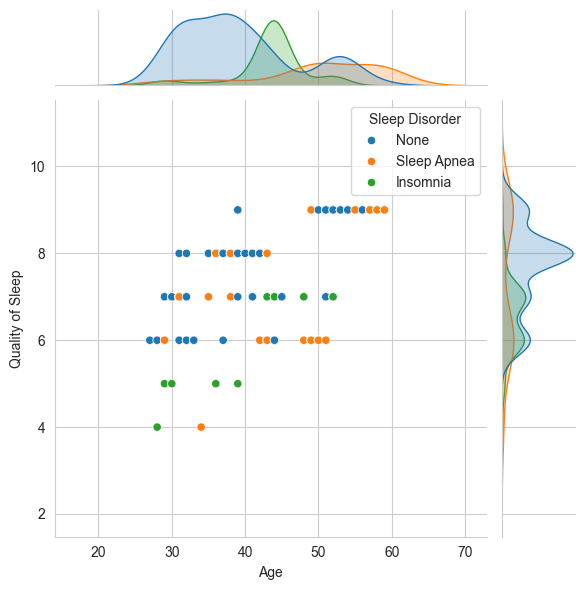

In [238]:
sns.jointplot(data = df, x = 'Age', y = 'Quality of Sleep', hue = 'Sleep Disorder')
plt.show()

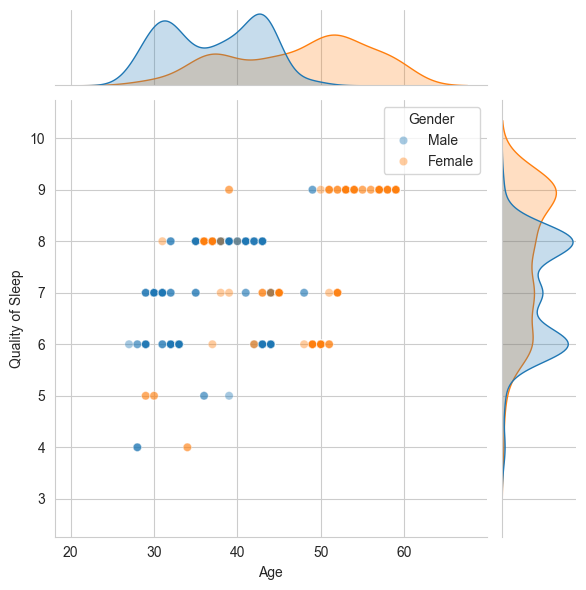

In [243]:
sns.jointplot(data = df, x = 'Age', y = 'Quality of Sleep', hue = 'Gender', alpha = 0.4)
plt.show()

## Categorical Analysis

In [231]:
df = data.copy()
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure High,Blood Pressure Low,Quality
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,ok
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,ok
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,ok
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,bad
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,bad


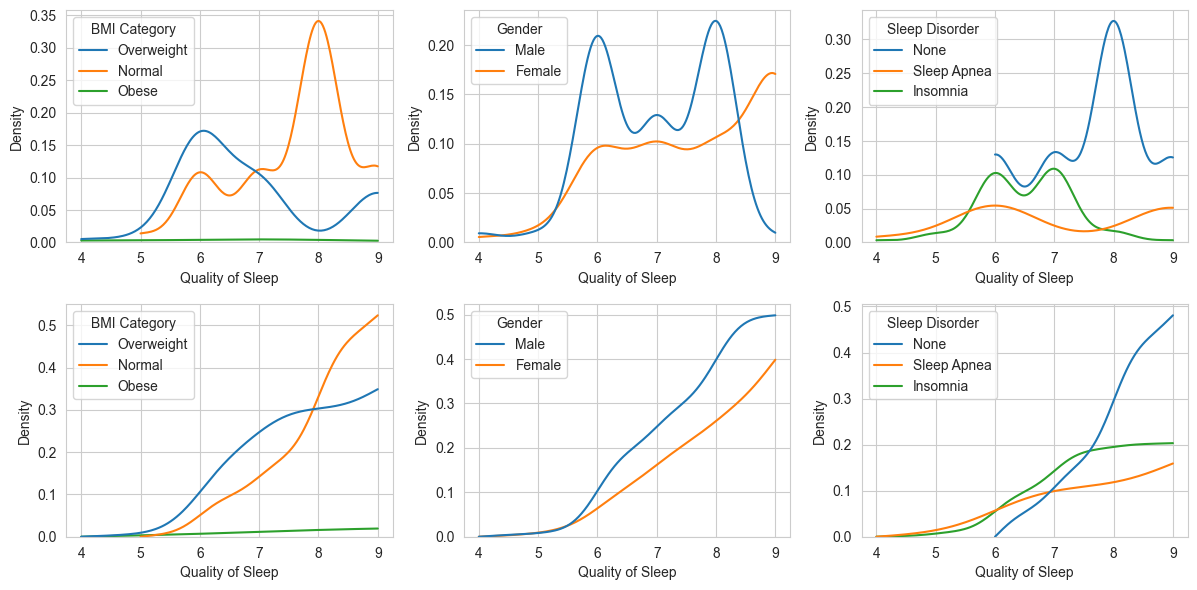

In [259]:
plt.figure(figsize = (12, 6))

i = 1
for feat in ['BMI Category', 'Gender', 'Sleep Disorder']:
    plt.subplot(2, 3, i)
    sns.kdeplot(hue = feat, x = 'Quality of Sleep', data = df, cut = 0)
    i += 1


for feat in ['BMI Category', 'Gender', 'Sleep Disorder']:
    plt.subplot(2, 3, i)
    sns.kdeplot(hue = feat, x = 'Quality of Sleep', data = df, cut = 0, cumulative = True)
    i += 1

plt.tight_layout()

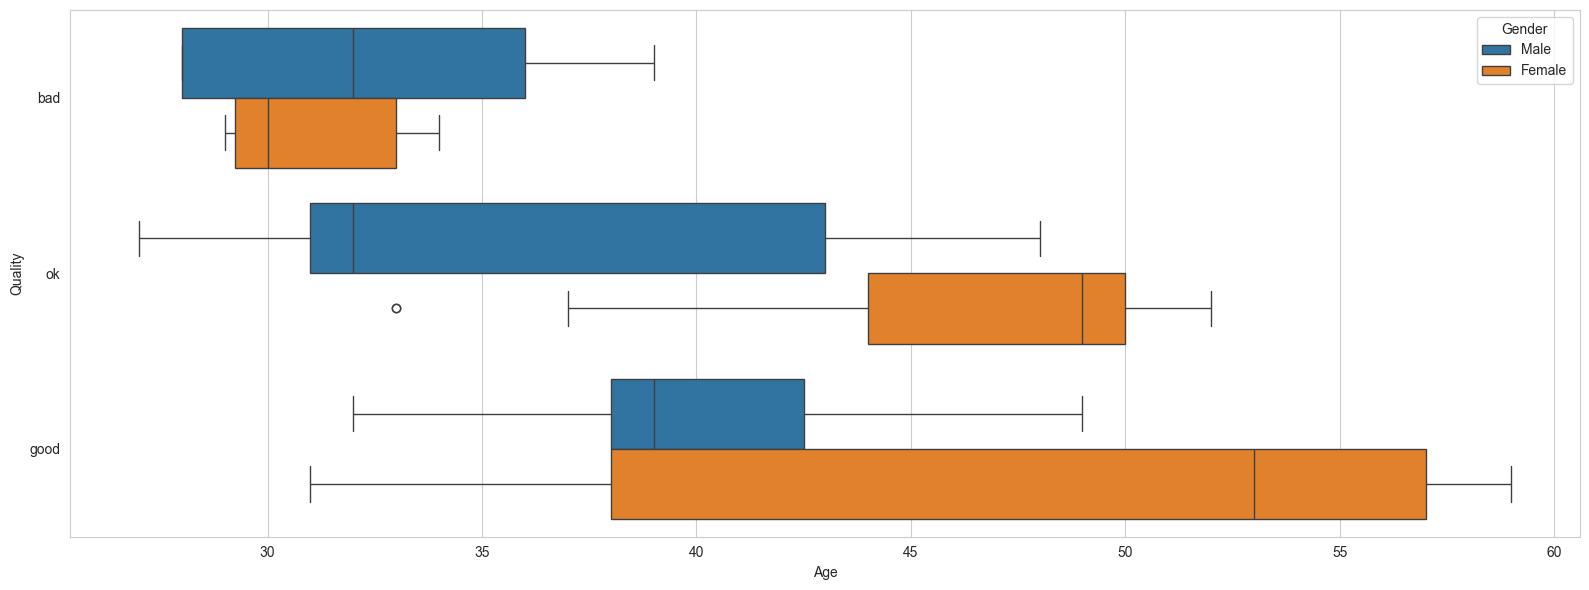

In [258]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df, x = 'Age', y = 'Quality', order = ['bad', 'ok', 'good'], hue = 'Gender')
plt.tight_layout()

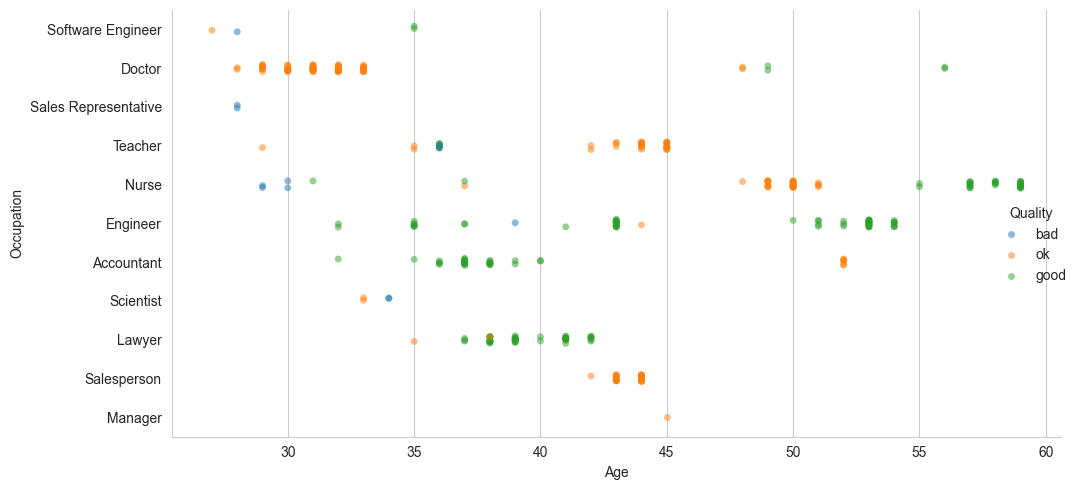

In [232]:
sns.catplot(data = df, x = 'Age', y = 'Occupation', hue = 'Quality', alpha = 0.5, hue_order = ['bad', 'ok', 'good'], aspect=2, height = 5)
plt.tight_layout()

In [239]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure High,Blood Pressure Low,Quality
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,ok
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,ok
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,ok
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,bad
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,bad


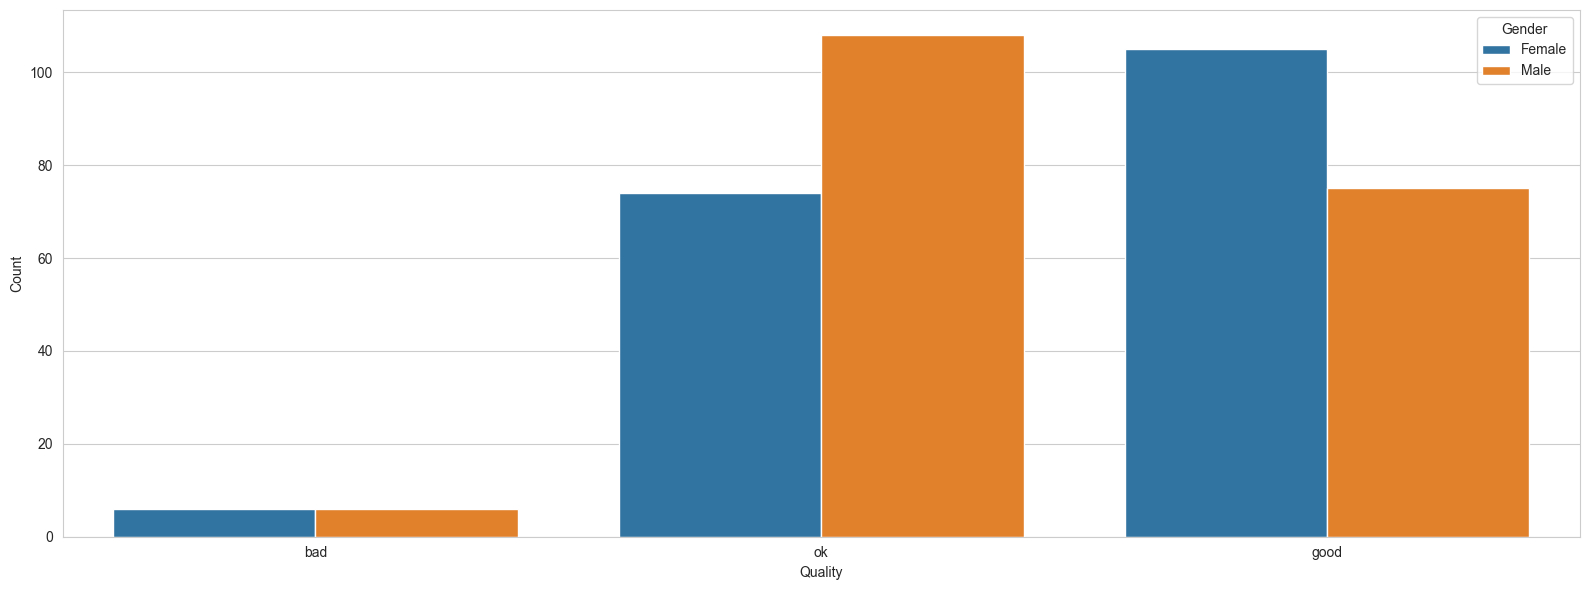

In [251]:
plt.figure(figsize = (16, 6))
tmp = df.groupby(['Gender', 'Quality'])['Person ID'].count().reset_index()
tmp.columns = ['Gender', 'Quality', 'Count']
sns.barplot(data = tmp, x = 'Quality', y = 'Count', hue = 'Gender', order = ['bad', 'ok', 'good'])
plt.tight_layout()

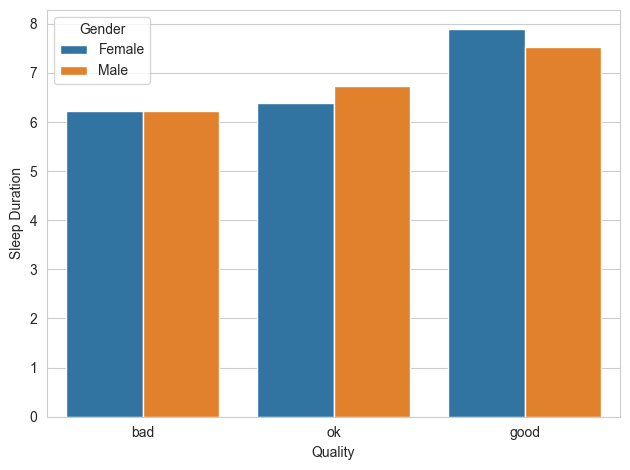

In [254]:
tmp = df.groupby(['Gender', 'Quality'])['Sleep Duration'].mean().reset_index()
tmp.columns = ['Gender', 'Quality', 'Sleep Duration']
sns.barplot(data = tmp, x = 'Quality', y = 'Sleep Duration', hue = 'Gender', order = ['bad', 'ok', 'good'])
plt.tight_layout()

# Q2. Produce recommendations on ways people can improve sleep health based on the patterns in the data.

In [376]:
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [412]:
df = data.copy()
df = df.drop(['Person ID', 'Occupation', 'Quality','Blood Pressure High', 'Blood Pressure Low', 'Sleep Duration'], axis = 1)
df = pd.get_dummies(df, drop_first=True)
df.columns = [c.replace(" ","_") for c in df.columns]
print(df.shape[0])
df = df.drop_duplicates()
print(df.shape[0])

X = df.drop('Quality_of_Sleep', axis = 1)
X = sm.add_constant(X)

y = df['Quality_of_Sleep'].map(target_mapping)

374
98


In [413]:
df['Quality_of_Sleep'] = df['Quality_of_Sleep'].map(target_mapping)

In [414]:
features = [d for d in df.columns if d != 'Quality_of_Sleep']

In [410]:
formula = 'Quality_of_Sleep ~ ' + ' + '.join(features)
formula

'Quality_of_Sleep ~ Age + Physical_Activity_Level + Stress_Level + Heart_Rate + Daily_Steps + Gender_Male + BMI_Category_Obese + BMI_Category_Overweight + Sleep_Disorder_None + Sleep_Disorder_Sleep_Apnea'

In [415]:
model = smf.logit(formula=formula, data=df).fit()

         Current function value: inf
         Iterations: 35


/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [402]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Quality_of_Sleep   No. Observations:                   98
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.8347
Time:                        00:25:04   Log-Likelihood:                -10.558
converged:                       True   LL-Null:                       -63.872
Covariance Type:            nonrobust   LLR p-value:                 7.013e-24
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.6223      9.283     -2.975      0.003     -45.817      -9.427
Age             -0.2749      0.144     -1.907      0.057      -0.558       0.008
Stress_Level     5.8930      2.081      2.832      0.005       1.815       9.972
================================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [378]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by = "VIF", ascending = False)

,feature,VIF
0,const,1216.567426
4,Heart_Rate,6.654164
5,Daily_Steps,5.437402
3,Stress_Level,4.257692
2,Physical_Activity_Level,4.171083
7,BMI_Category_Obese,3.187137
1,Age,2.348110
9,Sleep_Disorder_None,1.915669
8,BMI_Category_Overweight,1.826724
10,Sleep_Disorder_Sleep_Apnea,1.738643


In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [369]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [371]:
logreg.score(X_test, y_test)

0.95

In [374]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[13,  0],
       [ 1,  6]])

In [375]:
logreg.coef_

array([[-1.27860415e-01, -1.19776555e-01, -8.78552472e-03,
         2.45159851e+00, -1.15966561e-01, -3.40440046e-04,
        -4.89374863e-01, -3.96891675e-02,  8.01039782e-01,
        -2.02347113e-01,  4.94752099e-01]])

In [363]:

model = sm.Logit(y, X)
result = model.fit()

         Current function value: inf
         Iterations: 35


/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

# Q3. Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.